In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import spectral
from scipy.io import loadmat
import os
from HSI_class import HSI

# Check if GPU is available
print("GPU Available:", torch.cuda.is_available())

# If available, print the GPU name
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

GPU Available: True
GPU Name: NVIDIA GeForce GTX 1650


In [2]:
dataset_path = "Hyperspectral oil spill detection datasets"

dataset = []

i = 0
for filename in os.listdir(dataset_path):
    if i > 3:
        break
    file_path = os.path.join(dataset_path, filename)
    if os.path.isfile(file_path):  # Check if it's a file
        print(f"Processing file: {file_path}")
        hsi = HSI(file_path)
        dataset.append(hsi)
    i += 1

Processing file: Hyperspectral oil spill detection datasets\GM01.mat
Processing file: Hyperspectral oil spill detection datasets\GM02.mat
Processing file: Hyperspectral oil spill detection datasets\GM03.mat
Processing file: Hyperspectral oil spill detection datasets\GM04.mat


In [3]:
for hsi in dataset:
    print(f'{hsi.name}: {hsi.img.shape}')

GM01: (1243, 684, 224)
GM02: (1786, 699, 224)
GM03: (1386, 690, 224)
GM04: (1466, 676, 224)


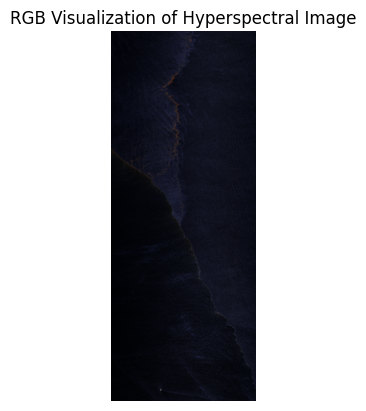

In [4]:
img = dataset[1].img
gt = dataset[1].gt
r_band = 31  # Red (around 660 nm) https://www.indexdatabase.de/db/s-single.php?id=28
g_band = 22  # Green (around 560 nm)
b_band = 10 # Blue (around 450 nm)

red_band = img[:, :, r_band]  # Adjust band index for red
green_band = img[:, :, g_band]  # Adjust band index for green
blue_band = img[:, :, b_band]  # Adjust band index for blue

# Normalize bands to range 0-1 for proper visualization
red_band = (red_band - np.min(red_band)) / (np.max(red_band) - np.min(red_band))
green_band = (green_band - np.min(green_band)) / (np.max(green_band) - np.min(green_band))
blue_band = (blue_band - np.min(blue_band)) / (np.max(blue_band) - np.min(blue_band))

rgb_image = np.stack((red_band, green_band, blue_band), axis=-1)

# Display the RGB image
plt.imshow(rgb_image)
plt.title("RGB Visualization of Hyperspectral Image")
plt.axis('off')
plt.show()

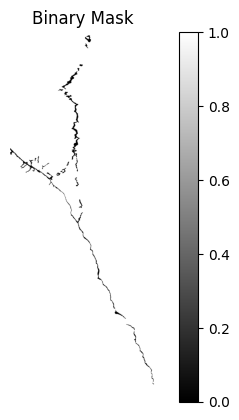

In [5]:
# Visualize the binary mask
plt.imshow(1 - gt, cmap='gray')  # Use 'gray' for binary visualization
plt.colorbar()
plt.title('Binary Mask')
plt.axis('off')
plt.show()

In [6]:
import createSample as CS
hsi_ = dataset[0]
patch_size = 9
sample_per_class = 20
selected_patch_0, selected_patch_1, random_indices_0, random_indices_1 = CS.createSample(hsi_, patch_size, sample_per_class)

hsi shape
(1243, 684, 224)
5 Randomly chosen 0 indices: [(np.int64(542), np.int64(130)), (np.int64(266), np.int64(210)), (np.int64(1090), np.int64(276)), (np.int64(1094), np.int64(128)), (np.int64(311), np.int64(128)), (np.int64(356), np.int64(676)), (np.int64(535), np.int64(392)), (np.int64(639), np.int64(412)), (np.int64(533), np.int64(629)), (np.int64(1238), np.int64(23)), (np.int64(1181), np.int64(358)), (np.int64(939), np.int64(571)), (np.int64(754), np.int64(53)), (np.int64(1096), np.int64(391)), (np.int64(79), np.int64(488)), (np.int64(994), np.int64(562)), (np.int64(798), np.int64(68)), (np.int64(1106), np.int64(19)), (np.int64(580), np.int64(182)), (np.int64(1003), np.int64(32))]
5 Randomly chosen 1 indices: [(np.int64(161), np.int64(133)), (np.int64(49), np.int64(571)), (np.int64(154), np.int64(14)), (np.int64(640), np.int64(85)), (np.int64(960), np.int64(40)), (np.int64(156), np.int64(441)), (np.int64(615), np.int64(439)), (np.int64(426), np.int64(222)), (np.int64(946), np.i

In [7]:
i =0
half_patch = patch_size // 2
print(hsi_.img[random_indices_0[i][0]][random_indices_0[i][1]])
print(selected_patch_0[i][half_patch][half_patch])

print(hsi_.img[random_indices_1[i][0]][random_indices_1[i][1]])
print(selected_patch_1[i][half_patch][half_patch])

[-196 -262  258  382  416  570  641  656  636  597  568  529  492  458
  431  409  390  367  344  315  292  275  258  244  227  209  201  203
  193  196  193  189  189  174  162  149  133  128  117  105  101  102
  105  101   96   96   94   86   87   89   81   82   87   81   82   74
   76   69   50   49   45   44  -10   54   88   90   87  101  118  116
  129  126  124  117  115  111   94   81   66   59  -59  -57  -39  -37
   38   55   70   83  104  107  119  117  126  133  141  172  149  140
  135  127   94   90   77  -21   38  -19 -164    0    0    0    0    0
    0 -121  -66  -85  -41  -13  -74    0   23   47   60   66   81   37
   88   91  101  102  109   96   99  107  103  103  106  101   91  106
  114  103  109   92   95   75   66   50   34   34   14  -40  -55    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   -9  -15   -3    4    9   10   19   33   46   46   55   58   76   74
   81   76   83   83   90   90   80   92   95   87   93   92  102   99
   92 

In [8]:
print(f"selected patch 0: {selected_patch_0.shape}")
print(f"selected patch 1: {selected_patch_1.shape}")

print(random_indices_0)
print(random_indices_1)

selected patch 0: (20, 9, 9, 224)
selected patch 1: (20, 9, 9, 224)
[(np.int64(542), np.int64(130)), (np.int64(266), np.int64(210)), (np.int64(1090), np.int64(276)), (np.int64(1094), np.int64(128)), (np.int64(311), np.int64(128)), (np.int64(356), np.int64(676)), (np.int64(535), np.int64(392)), (np.int64(639), np.int64(412)), (np.int64(533), np.int64(629)), (np.int64(1238), np.int64(23)), (np.int64(1181), np.int64(358)), (np.int64(939), np.int64(571)), (np.int64(754), np.int64(53)), (np.int64(1096), np.int64(391)), (np.int64(79), np.int64(488)), (np.int64(994), np.int64(562)), (np.int64(798), np.int64(68)), (np.int64(1106), np.int64(19)), (np.int64(580), np.int64(182)), (np.int64(1003), np.int64(32))]
[(np.int64(161), np.int64(133)), (np.int64(49), np.int64(571)), (np.int64(154), np.int64(14)), (np.int64(640), np.int64(85)), (np.int64(960), np.int64(40)), (np.int64(156), np.int64(441)), (np.int64(615), np.int64(439)), (np.int64(426), np.int64(222)), (np.int64(946), np.int64(599)), (np.i

In [9]:
indices = random_indices_0 +  random_indices_1

# Concatenating along axis 0
x_train = np.concatenate((selected_patch_0, selected_patch_1), )

y_train = np.array([])

gt = hsi_.gt
for indice in indices:
    # print(gt[indice[0]][indice[1]])
    y_train = np.append(y_train, gt[indice[0]][indice[1]])

count = np.count_nonzero(y_train == 0)  # Count elements equal to 0
print(f'number of element equal 0 {count}')

count = np.count_nonzero(y_train == 1)  # Count elements equal to 1
print(f'number of element equal 1 {count}')


print(y_train)
print(y_train.shape) 


# Print shape to verify
print(x_train.shape)  # Expected output: (10, 9, 9, 224)
print(y_train.shape) 

print(y_train)

number of element equal 0 20
number of element equal 1 20
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(40,)
(40, 9, 9, 224)
(40,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
# Augmentation
import augmentation as aug

n_category = 2
band_size = 224
num_per_category = 200

data_augment1, label_augment1 = aug.Augment_data(x_train, y_train, n_category, patch_size, band_size, num_per_category)

data_augment2, label_augment2 = aug.Augment_data2(x_train, y_train, n_category, patch_size, band_size)

j:  400


In [11]:
print(data_augment1.shape)
print(label_augment1.shape)

print(data_augment2.shape)
print(label_augment2.shape)

print(label_augment1)
print(label_augment2)

# Count occurrences of each unique element
counts1 = np.bincount(label_augment1)

# Print results
for i, count in enumerate(counts1):
    print(f"Element {i} occurs {count} times.")

counts2 = np.bincount(label_augment2)

# Print results
for i, count in enumerate(counts2):
    print(f"Element {i} occurs {count} times.")

    

(400, 9, 9, 224)
(400,)
(400, 9, 9, 224)
(400,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [12]:
data_augment = np.concatenate((data_augment1, data_augment2))
label_augment = np.concatenate((label_augment1, label_augment2))

print(data_augment.shape)
print(label_augment.shape)

print(label_augment)

# Count occurrences of each unique element
counts = np.bincount(label_augment)

# Print results
for i, count in enumerate(counts):
    print(f"Element {i} occurs {count} times.")

(800, 9, 9, 224)
(800,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 

In [13]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models import vgg16

In [14]:
class VGG16_HSI(nn.Module):
    def __init__(self, num_classes=2):
        super(VGG16_HSI, self).__init__()

         # Custom Convolutional Layer: Process 9x9x224 input
        self.pre_conv = nn.Sequential(
            nn.Conv2d(in_channels=224, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.AdaptiveAvgPool2d((1, 1))  # Reduce to (256, 1, 1)
        )

        # Fully Connected Layer to reshape to (64, 56, 56)
        self.fc = nn.Linear(256 * 1 * 1, 64 * 56 * 56)

        # Load VGG-16 Model
        self.vgg = vgg16(pretrained=True)

        # Remove first VGG-16 conv layer
        self.vgg.features = nn.Sequential(*list(self.vgg.features.children())[1:])

        # Modify classifier to output 2 classes
        self.vgg.classifier[6] = nn.Linear(4096, num_classes)

    def forward(self, x):
        # print(f'before {x.shape}')
        x = self.pre_conv(x)  # Process hyperspectral input
        x = x.view(x.size(0), -1)  # Flatten

        # print(f'after preconv {x.shape}')
        x = self.fc(x)  # Fully connected layer
        # print(f'after fc {x.shape}')
        # Reshape to (batch_size, 64, 56, 56) before passing to VGG
        x = x.view(x.size(0), 64, 56, 56)
        # print(f'after reshape, before vgg second layer {x.shape}')

        x = self.vgg.features(x)  # Pass to VGG-16
        x = self.vgg.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.vgg.classifier(x)  # Final classification layer

        return x


In [15]:
test = data_augment[0]
test = torch.tensor(test)
test = test.to(torch.float32)
test = test.unsqueeze(0)

print(test.shape)

torch.Size([1, 9, 9, 224])


In [16]:
# Example usage
print("creating model...")
model = VGG16_HSI()
print("model created")


creating model...


c:\Users\Asus TUF\Documents\code\TA\myenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Asus TUF\Documents\code\TA\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


model created


In [17]:
print(model)

VGG16_HSI(
  (pre_conv): Sequential(
    (0): Conv2d(224, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): AdaptiveAvgPool2d(output_size=(1, 1))
  )
  (fc): Linear(in_features=256, out_features=200704, bias=True)
  (vgg): VGG(
    (features): Sequential(
      (0): ReLU(inplace=True)
      (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU(inplace=True)
      (6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)


In [18]:
input = test
input = input.permute(0, 3, 1, 2)


# Pass the input through the model
output = model(input)

# Print the output shape
print("Output Shape:", output.shape)

output_value = output.detach().numpy() 
print(output_value)

Output Shape: torch.Size([1, 2])
[[-0.09602118  0.5490687 ]]


In [19]:
from torch.utils.data import Dataset, DataLoader

num_train_samples = 800
num_val_samples = 1000
num_channels = 224  # Hyperspectral bands
height, width = 9, 9

X_train = data_augment
X_train = torch.tensor(X_train)
X_train = X_train.to(torch.float32)
X_train = X_train.permute(0, 3, 1, 2)
print(X_train.shape)

y_train = torch.tensor(label_augment)

print(y_train.shape)


torch.Size([800, 224, 9, 9])
torch.Size([800])


In [20]:
# Generate validation data
hsi_val = dataset[1]
patch_size = 9
sample_per_class = 500
selected_patch_0, selected_patch_1, random_indices_0, random_indices_1 = CS.createSample(hsi_val, patch_size, sample_per_class)


hsi shape
(1786, 699, 224)
5 Randomly chosen 0 indices: [(np.int64(1279), np.int64(105)), (np.int64(927), np.int64(490)), (np.int64(1240), np.int64(124)), (np.int64(1154), np.int64(107)), (np.int64(390), np.int64(268)), (np.int64(907), np.int64(254)), (np.int64(1061), np.int64(136)), (np.int64(610), np.int64(671)), (np.int64(921), np.int64(623)), (np.int64(1175), np.int64(296)), (np.int64(600), np.int64(305)), (np.int64(1732), np.int64(130)), (np.int64(1157), np.int64(355)), (np.int64(816), np.int64(100)), (np.int64(1548), np.int64(488)), (np.int64(1162), np.int64(162)), (np.int64(723), np.int64(231)), (np.int64(1653), np.int64(330)), (np.int64(35), np.int64(356)), (np.int64(1461), np.int64(70)), (np.int64(1538), np.int64(112)), (np.int64(880), np.int64(548)), (np.int64(234), np.int64(647)), (np.int64(990), np.int64(40)), (np.int64(1384), np.int64(657)), (np.int64(1529), np.int64(297)), (np.int64(106), np.int64(272)), (np.int64(458), np.int64(461)), (np.int64(1177), np.int64(19)), (np.

In [21]:

indices = random_indices_0 + random_indices_1


# Concatenating along axis 0
X_val = np.concatenate((selected_patch_0, selected_patch_1), axis=0)
# Print shape to verify
X_val = torch.tensor(X_val)
X_val = X_val.to(torch.float32)
X_val = X_val.permute(0, 3, 1, 2)
print(X_val.shape)  # Expected output: (10, 9, 9, 224)


y_val = np.array([])

gt = hsi_val.gt
for indice in indices:
    # print(gt[indice[0]][indice[1]])
    y_val = np.append(y_val, gt[indice[0]][indice[1]])

count = np.count_nonzero(y_val == 0)  # Count elements equal to 0
print(count)

count = np.count_nonzero(y_val == 1)  # Count elements equal to 1
print(count)

y_val = torch.tensor(y_val)
y_val = y_val.to(torch.long)
print(y_val)
print(y_val.shape) 



torch.Size([1000, 224, 9, 9])
500
500
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  

In [22]:
# Custom Dataset Class
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]
    

In [23]:
# Create separate datasets
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)

# Create DataLoaders
batch_size = 10
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Example: Fetching a batch from the training set
i = 0
for images, labels in train_loader:
    i += 1
    print(f"{i}: Training Batch - images shape: {images.shape}, labels shape: {labels.shape}")
    # break

# Example: Fetching a batch from the validation set
i = 0
for images, labels in val_loader:
    i += 1
    print(f"{i}: Validation Batch - images shape: {images.shape}, labels shape: {labels.shape}")
    # break

1: Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
2: Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
3: Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
4: Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
5: Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
6: Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
7: Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
8: Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
9: Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
10: Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
11: Training Batch - images shape: torch.Size([10, 224, 9, 

In [24]:

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
loss_fn = torch.nn.CrossEntropyLoss()

In [25]:


def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(train_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 5 == 4:
            last_loss = running_loss / 5 # loss  per 5 batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(train_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [26]:
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 10

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)

    print("checkpoint 1: after training_one_epoch()")

    running_vloss = 0.0
    correct = 0
    total = 0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    print("checkpoint 2: after model eval()")

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

            # Compute accuracy
            _, predicted = torch.max(voutputs, 1)  # Get predicted class index
            correct += (predicted == vlabels).sum().item()
            total += vlabels.size(0)


    avg_vloss = running_vloss / (i + 1)
    accuracy = 100 * correct / total

    print('LOSS train {} valid {} | Accuracy: {:.2f}%'.format(avg_loss, avg_vloss, accuracy))
    print("checkpoint 3: after calculating loss and accuracy")  

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.add_scalar('Validation Accuracy', accuracy, epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = './models/model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:
  batch 5 loss: 0.7501860737800599
  batch 10 loss: 0.7602809190750122
  batch 15 loss: 0.6241700232028962
  batch 20 loss: 0.7180173337459564
  batch 25 loss: 0.4521186888217926
  batch 30 loss: 0.5185627937316895
  batch 35 loss: 0.23493192493915557
  batch 40 loss: 0.16833836063742638
  batch 45 loss: 0.255059814453125
  batch 50 loss: 0.29212815314531326
  batch 55 loss: 0.7031577289104461
  batch 60 loss: 0.4835504174232483
  batch 65 loss: 0.36260215640068055
  batch 70 loss: 0.27389343827962875
  batch 75 loss: 0.37408783957362174
  batch 80 loss: 0.35781486630439757
checkpoint 1: after training_one_epoch()
checkpoint 2: after model eval()
LOSS train 0.35781486630439757 valid 1.5092066526412964 | Accuracy: 53.20%
checkpoint 3: after calculating loss and accuracy
EPOCH 2:
  batch 5 loss: 0.2587394118309021
  batch 10 loss: 0.2695895791053772
  batch 15 loss: 0.6192932277917862
  batch 20 loss: 0.38718031346797943
  batch 25 loss: 0.3567249417304993
  batch 30 loss: 0.168

In [27]:
def predict(input):

    with torch.no_grad():  # Disable gradients for inference
        output = model(input)

    # Convert logits to class label
    predicted_class = torch.argmax(output, dim=1).item()
    confidence = torch.nn.functional.softmax(output, dim=1)[0, predicted_class].item()

    return predicted_class, confidence

In [28]:
import zeroPadding
hsi_test = dataset[2]

test_img = hsi_test.img
test_gt = hsi_test.gt

width = test_img.shape[0]
height = test_img.shape[1]

matrix=zeroPadding.zeroPadding_3D(test_img,half_patch) #add 0 in every side of the data
print(test_img.shape)
print(matrix.shape)
print(f"number of pixel {width * height}")


total = 0
correct = 0

test = 1
break_flag = 0
for i in range(width):
    if break_flag == 1:
        break
    
    for j in range(height):
        if test > 10000:
            print("break")
            break_flag = 1
            break
        x_pos = i
        y_pos = j
        selected_rows = matrix[range(x_pos,x_pos+2*half_patch+1), :]
        testing_patch = selected_rows[:, range(y_pos, y_pos+2*half_patch+1)]

        testing_patch = torch.tensor(testing_patch)
        testing_patch = testing_patch.to(torch.float32)
        testing_patch = testing_patch.unsqueeze(0)
        testing_patch = testing_patch.permute(0, 3, 1, 2)

        prediction, confidence = predict(testing_patch)

        true_label = test_gt[i][j]

        print(f"{test}: {testing_patch.shape}: {prediction}, {confidence}, expecteed class: {true_label}")

        if(prediction == true_label):
            correct += 1

        test +=1
        total += 1

print(f"{correct}/{total}")
     



(1386, 690, 224)
(1394, 698, 224)
number of pixel 956340
1: torch.Size([1, 224, 9, 9]): 1, 0.8360802531242371, expecteed class: 0
2: torch.Size([1, 224, 9, 9]): 1, 0.8727533221244812, expecteed class: 0
3: torch.Size([1, 224, 9, 9]): 1, 0.8951362371444702, expecteed class: 0
4: torch.Size([1, 224, 9, 9]): 1, 0.9157469868659973, expecteed class: 0
5: torch.Size([1, 224, 9, 9]): 1, 0.8976386189460754, expecteed class: 0
6: torch.Size([1, 224, 9, 9]): 1, 0.899881899356842, expecteed class: 0
7: torch.Size([1, 224, 9, 9]): 1, 0.9023314118385315, expecteed class: 0
8: torch.Size([1, 224, 9, 9]): 1, 0.9030374884605408, expecteed class: 0
9: torch.Size([1, 224, 9, 9]): 1, 0.9190869927406311, expecteed class: 0
10: torch.Size([1, 224, 9, 9]): 1, 0.9327577948570251, expecteed class: 0
11: torch.Size([1, 224, 9, 9]): 1, 0.9326507449150085, expecteed class: 0
12: torch.Size([1, 224, 9, 9]): 1, 0.9391434788703918, expecteed class: 0
13: torch.Size([1, 224, 9, 9]): 1, 0.937423586845398, expecteed c

In [ ]:
import zeroPadding
hsi_test = dataset[2]

test_img = hsi_test.img
test_gt = hsi_test.gt

width = test_img.shape[0]
height = test_img.shape[1]

matrix=zeroPadding.zeroPadding_3D(test_img,half_patch) #add 0 in every side of the data
print(test_img.shape)
print(matrix.shape)
print(f"number of pixel {width * height}")


total = 0
correct = 0

test = 1
break_flag = 0
for i in range(width):
    if break_flag == 1:
        break
    
    for j in range(height):
        if test > 10000:
            print("break")
            break_flag = 1
            break
        x_pos = i
        y_pos = j
        selected_rows = matrix[range(x_pos,x_pos+2*half_patch+1), :]
        testing_patch = selected_rows[:, range(y_pos, y_pos+2*half_patch+1)]

        testing_patch = torch.tensor(testing_patch)
        testing_patch = testing_patch.to(torch.float32)
        testing_patch = testing_patch.unsqueeze(0)
        testing_patch = testing_patch.permute(0, 3, 1, 2)

        prediction, confidence = predict(testing_patch)

        true_label = test_gt[i][j]

        print(f"{test}: {testing_patch.shape}: {prediction}, {confidence}, expecteed class: {true_label}")

        if(prediction == true_label):
            correct += 1

        test +=1
        total += 1

print(f"{correct}/{total}")
     



(1386, 690, 224)
(1394, 698, 224)
number of pixel 956340
1: torch.Size([1, 224, 9, 9]): 1, 0.8360802531242371, expecteed class: 0
2: torch.Size([1, 224, 9, 9]): 1, 0.8727533221244812, expecteed class: 0
3: torch.Size([1, 224, 9, 9]): 1, 0.8951362371444702, expecteed class: 0
4: torch.Size([1, 224, 9, 9]): 1, 0.9157469868659973, expecteed class: 0
5: torch.Size([1, 224, 9, 9]): 1, 0.8976386189460754, expecteed class: 0
6: torch.Size([1, 224, 9, 9]): 1, 0.899881899356842, expecteed class: 0
7: torch.Size([1, 224, 9, 9]): 1, 0.9023314118385315, expecteed class: 0
8: torch.Size([1, 224, 9, 9]): 1, 0.9030374884605408, expecteed class: 0
9: torch.Size([1, 224, 9, 9]): 1, 0.9190869927406311, expecteed class: 0
10: torch.Size([1, 224, 9, 9]): 1, 0.9327577948570251, expecteed class: 0
11: torch.Size([1, 224, 9, 9]): 1, 0.9326507449150085, expecteed class: 0
12: torch.Size([1, 224, 9, 9]): 1, 0.9391434788703918, expecteed class: 0
13: torch.Size([1, 224, 9, 9]): 1, 0.937423586845398, expecteed c